# Cas pratique en réseau



**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [Cas 1 : OSPF](#toc2_)    
  - [Description](#toc2_1_)    
  - [L'algorithme de Dijkstra dans OSPF](#toc2_2_)    
  - [Exemple de fonctionnement en Python](#toc2_3_)    
- [Cas 2 : networkx](#toc3_)    
  - [Description](#toc3_1_)    
  - [Algorithmes utilisés](#toc3_2_)    
  - [Dijkstra](#toc3_3_)    
  - [A*](#toc3_4_)    
  - [Floyd-Warshall](#toc3_5_)    
    - [Comparaison entre Floyd-Warshall et Dijkstra](#toc3_5_1_)    
  - [Bellman-Ford](#toc3_6_)    
    - [Comparaison entre Bellman-Ford et Dijkstra](#toc3_6_1_)    
- [Sources](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Introduction](#toc0_)

Description de ce qu'on va faire

## <a id='toc2_'></a>[Cas 1 : OSPF](#toc0_)

### <a id='toc2_1_'></a>[Description](#toc0_)

OSPF (Open Shortest Path First) est un protocole de routage d’état de liaison. Il est conçu pour être utilisé au sein d’un seul et même système autonome. Chaque routeur OSPF maintient une base de données identique décrivant la topologie du système dont il fait partie. À partir de cette base de données, une table de routage est calculée en construisant un arbre des chemins les plus courts.


### <a id='toc2_2_'></a>[L'algorithme de Dijkstra dans OSPF](#toc0_)

OSPF utilise l'algorithme de Dijkstra pour construire l'arbre des chemins les plus courts à partir de chaque routeur vers tous les autres nœuds d'un réseau. L'objectif est de calculer la meilleure route en fonction du coût, où le coût peut être défini en fonction de métriques telles que la bande passante ou la latence. Ce qui permet d'établir les tables de routages de chaque routeur.

Voici comment cela fonctionne dans le protocole OSPF :
1. Chaque routeur construit une base de données d'état de liaison (LSDB) contenant des informations sur la topologie du réseau, obtenues via des **messages d'état de liaison**.
2. À partir de la LSDB, l'algorithme de Dijkstra est exécuté pour calculer un arbre couvrant minimal. Cet arbre représente les chemins les plus courts depuis le routeur courant vers tous les autres routeurs.
3. La table de routage est générée en se basant sur cet arbre.

La RFC 2328 spécifie en détail comment les routeurs communiquent leurs informations et utilisent ces données pour construire leurs tables de routage.



### <a id='toc2_3_'></a>[Exemple de fonctionnement en Python](#toc0_)

Nous allons construire un graphe représentant un réseau avec des routeurs et des liens, chaque lien ayant un coût associé. Ensuite, nous utiliserons un algorithme basé sur Dijkstra pour déterminer les chemins les plus courts à partir d'un routeur donné.


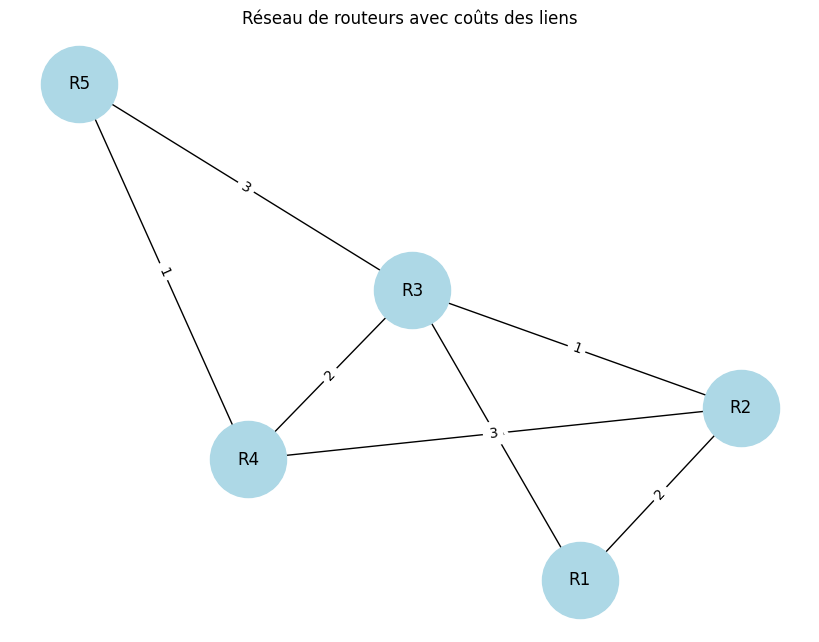

Chemins les plus courts depuis R1 :
Vers R1: chemin ['R1'] avec coût total 0
Vers R2: chemin ['R1', 'R2'] avec coût total 2
Vers R3: chemin ['R1', 'R2', 'R3'] avec coût total 3
Vers R4: chemin ['R1', 'R2', 'R4'] avec coût total 5
Vers R5: chemin ['R1', 'R2', 'R3', 'R5'] avec coût total 6


In [2]:

import networkx as nx
import matplotlib.pyplot as plt

# Création d'un graphe représentant le réseau
network = nx.Graph()

# Ajouter les routeurs (nœuds) et les liens (arêtes) avec des coûts
edges = [
    ("R1", "R2", 2),
    ("R1", "R3", 5),
    ("R2", "R3", 1),
    ("R2", "R4", 3),
    ("R3", "R4", 2),
    ("R3", "R5", 3),
    ("R4", "R5", 1)
]

network.add_weighted_edges_from(edges)

# Visualiser le graphe
pos = nx.spring_layout(network)
plt.figure(figsize=(8, 6))
nx.draw(network, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12)
labels = nx.get_edge_attributes(network, 'weight')
nx.draw_networkx_edge_labels(network, pos, edge_labels=labels)
plt.title("Réseau de routeurs avec coûts des liens")
plt.show()

# Algorithme de Dijkstra à partir de R1
source_router = "R1"
shortest_paths = nx.single_source_dijkstra_path(network, source=source_router)
shortest_distances = nx.single_source_dijkstra_path_length(network, source=source_router)

# Afficher les résultats
print(f"Chemins les plus courts depuis {source_router} :")
for dest, path in shortest_paths.items():
    print(f"Vers {dest}: chemin {path} avec coût total {shortest_distances[dest]}")


## <a id='toc3_'></a>[Cas 2 : networkx](#toc0_)


### <a id='toc3_1_'></a>[Description](#toc0_)

NetworkX est une bibliothèque Python utilisée pour la création, la manipulation et l'étude de structures de graphes et réseaux complexes. Elle offre des outils pour représenter des graphes sous forme de structures de données (orientés, non orientés, pondérés, etc.) et propose des algorithmes avancés pour analyser leurs propriétés, comme les plus courts chemins, la centralité, la connectivité, et bien plus.



### <a id='toc3_2_'></a>[Algorithmes utilisés](#toc0_)

Networkx propose plusieurs algorithmes pour travailler sur les graphes :
Les algorithmes de Dijkstra et A* sont utilisés pour trouver les plus courts chemins entre deux graphes mais également d'autres algoritjmes comme Floyd-Warshall et Bellman-Ford.

Dans les bouts de code ci-dessous nous allons voir l'utilisations des algorithmes de Dijkstra, A*, Floyd-Warshall et Bellman-Ford dans networkx.



In [3]:
import networkx as nx

# Création du graphe pondéré
G = nx.DiGraph()
G.add_weighted_edges_from([("A", "B", 1), ("B", "C", 2), ("A", "C", 4), ("C", "D", 1)])

### <a id='toc3_3_'></a>[Dijkstra](#toc0_)

L'algorithme de Dijkstra est utilisé pour trouver le plus court chemin dans un graphe pondéré avec des poids positifs. Il fonctionne en explorant systématiquement les chemins les moins coûteux depuis le sommet de départ, garantissant la solution optimale.

In [4]:
# Plus court chemin de A à D
shortest_path = nx.dijkstra_path(G, source="A", target="D", weight="weight")
print("Plus court chemin (Dijkstra) :", shortest_path)

Plus court chemin (Dijkstra) : ['A', 'B', 'C', 'D']


### <a id='toc3_4_'></a>[A*](#toc0_)

L'algorithme A* améliore Dijkstra en utilisant une fonction heuristique qui estime la distance restante jusqu'à la cible. Cela permet de réduire le nombre de nœuds explorés et accélère la recherche du chemin optimal.

Ici la fonction heuristique est la place dans l'alphabet du nom des noeuds.

In [5]:
# Heuristique basée sur une distance fictive
def heuristic(u, v):
    return abs(ord(u) - ord(v))  # Différence simple des codes ASCII


# Plus court chemin utilisant A*
a_star_path = nx.astar_path(
    G, source="A", target="D", heuristic=heuristic, weight="weight"
)
print("Plus court chemin (A*) :", a_star_path)

Plus court chemin (A*) : ['A', 'B', 'C', 'D']


### <a id='toc3_5_'></a>[Floyd-Warshall](#toc0_)

L'algorithme de Floyd-Warshall trouve les plus courts chemins entre tous les couples de nœuds dans un graphe pondéré avec ou sans poids négatifs. 
Il utilise une approche dynamique, en comparant cas par cas chaque doublon et en ne gardant que les meilleurs distances à chaque étape.
Le graphe sur lequel on applique l'algorithme ne doit pas avoir de cycles négatifs (Cycle dont la somme des poids des arêtes est négative).

Lien académique vers une bonne explication : (Université technique de Munich) 

https://algorithms.discrete.ma.tum.de/graph-algorithms/spp-floyd-warshall/index_en.html


In [8]:
#Utilisation de floyd-Warshall
shortest_paths_matrix = dict(nx.floyd_warshall(G, weight="weight"))

# On formate le résultat obtenu pour le rendre plus lisible
formatted_paths = {node: dict(paths) for node, paths in shortest_paths_matrix.items()}
from pprint import pprint

pprint(formatted_paths)

{'A': {'A': 0, 'B': 1, 'C': 3, 'D': 4},
 'B': {'A': inf, 'B': 0, 'C': 2, 'D': 3},
 'C': {'A': inf, 'B': inf, 'C': 0, 'D': 1},
 'D': {'A': inf, 'B': inf, 'C': inf, 'D': 0}}


#### <a id='toc3_5_1_'></a>[Comparaison entre Floyd-Warshall et Dijkstra](#toc0_)

Premierement Floyd-Warshall et Dijkstra ne peuvent pas être comparer directement car ils n'ont pas directement le même but. L'algorithme de Floyd-Warshall est catégorisé comme un APSP (All-pairs Shortest path) et Dijkstra comme SSP (Single-source Shortest path). 

On peut transformer Dijkstra en APSP en l'appliquant à chaque noeud du graphe, sa complexité est donc multipliée par le nombre de noeuds du graphe.

On peut poser $V$ le nombre de noeuds du graphe, $E$ le nombre d'arêtes du graphes. 

Dans le pire des cas Floyd-Warshall a une complexité de $O(V^3)$
L'implémentation de Dijkstra varie en fonction de la structure de données utilisées :
- Avec une file de priorité : $O((V+E)log(V)) = O(V^3)$
- Avec une file de priorité avec tas binaire $O(VE log V)$
- Avec un tas de fibonnaci $O(V^2 log V + VE)$   

Dans d'autre termes si le graphe est dense (beaucoup d'arêtes) Floyd-Warshall est plus efficace, si le graphe est clairsemé (peu d'arêtes) Dijkstra est plus efficace.





### <a id='toc3_6_'></a>[Bellman-Ford](#toc0_)

L'algorithme de Bellman-Ford calcule le plus court chemin dans les graphes où les poids peuvent être négatifs. Il explore tous les chemins possibles et mise à jour les coûts minimaux.

In [7]:
# Plus court chemin avec Bellman-Ford
shortest_path_bf = nx.bellman_ford_path(G, source="A", target="D", weight="weight")
print("Plus court chemin (Bellman-Ford) :", shortest_path_bf)

Plus court chemin (Bellman-Ford) : ['A', 'B', 'C', 'D']


#### <a id='toc3_6_1_'></a>[Comparaison entre Bellman-Ford et Dijkstra](#toc0_)

L'algorithme de Bellman-Ford est plus lent que l'algorithme de Dijkstra avec une complexité de $O(VE)$ mais à l'avantage de pouvoir traiter les graphes à poids négatifs et de detecter les cycles négatifs dans des graphes. 

## <a id='toc4_'></a>[Sources](#toc0_)

La version actuelle la plus utilisé est OSPFv2, définie dans la RFC 2328.

La RFC de OSPF : https://www.ietf.org/rfc/rfc2328.txt

RFC (Request For Comments) : Les RFC sont des documents qui décrivent les protocoles, les procédures, les programmes et les concepts qui constituent Internet. Ils sont écrits et publiés par l'Internet Engineering Task Force (IETF).

Github networkx : https://github.com/networkx/networkx

Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. Introduction to Algorithms. MIT Press, 2009. Disponible en ligne : 
[PDF du livre](http://debracollege.dspaces.org/bitstream/123456789/106/1/Introduction%20to%20Algorithms%20by%20Thomas%20%20H%20Coremen.pdf#%5B%7B%22num%22%3A1827%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22Fit%22%7D%5D)